In [1]:
import pandas as pd
from molecules import Molecule
from tqdm.auto import tqdm
from typing import List

/Users/visanim/work/random-markov-field/fake_extract/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel("./apex_bio.xlsx", sheet_name="Chemical Data")

In [3]:
molecules: List[Molecule] = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    mol = Molecule(
        apex_cas_number=row["CAS Number"],
        apex_item_name=row["Item Name"],
        apex_molecular_weight=row["M.w."],
        apex_molecular_formula=row["Formula"],
        apex_smiles=row["SMILES"],
        catalog_number=row["CatalogNumber"],
        plate_location=row["Plate Location"],
        rack_number_as_str=row["Rack Number"],
    )
    molecules.append(mol)

 17%|█▋        | 94/550 [00:29<02:21,  3.22it/s] [13:59:46] SMILES Parse Error: syntax error while parsing: O=C([C@]([H])(C)NC([C@](N)([H])CNC1=O)=O)N[C@@]([H])(CNC(CC(CCCN)N)=O)C(NC(C(N[C@@]1([H])[C@@H]2CCNC(N)=N2)=O)=CNC(N)=O)=O.[xH2SO4]
[13:59:46] SMILES Parse Error: check for mistakes around position 125:
[13:59:46] N2)=O)=CNC(N)=O)=O.[xH2SO4]
[13:59:46] ~~~~~~~~~~~~~~~~~~~~^
[13:59:46] SMILES Parse Error: Failed parsing SMILES 'O=C([C@]([H])(C)NC([C@](N)([H])CNC1=O)=O)N[C@@]([H])(CNC(CC(CCCN)N)=O)C(NC(C(N[C@@]1([H])[C@@H]2CCNC(N)=N2)=O)=CNC(N)=O)=O.[xH2SO4]' for input: 'O=C([C@]([H])(C)NC([C@](N)([H])CNC1=O)=O)N[C@@]([H])(CNC(CC(CCCN)N)=O)C(NC(C(N[C@@]1([H])[C@@H]2CCNC(N)=N2)=O)=CNC(N)=O)=O.[xH2SO4]'
 18%|█▊        | 99/550 [00:33<03:14,  2.31it/s][13:59:51] Explicit valence for atom # 17 P, 7, is greater than permitted
[13:59:51] Explicit valence for atom # 17 P, 7, is greater than permitted
[13:59:51] Explicit valence for atom # 17 P, 7, is greater than permitted
[13:59:51] Expl

Error fetching compound by SMILES.


 26%|██▌       | 142/550 [00:34<00:44,  9.07it/s][13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than permitted
[13:59:52] Explicit valence for atom # 19 P, 7, is greater than

In [4]:
failed_cas = pd.concat(
    [i.to_dataframe() for i in molecules if i.failed_cas_number], ignore_index=True
)

/var/folders/ll/v9q3qnpx27d8g0shfnvjnslrfgd6wf/T/ipykernel_66880/4178019176.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  failed_cas = pd.concat(


In [5]:
failed_cas

,catalog_number,plate_location,rack_number,apex_cas_number,apex_item_name,apex_molecular_weight,apex_molecular_formula,apex_smiles,apex_valid_smiles,failed_cas_number,failed_item_name,failed_smiles,super_parent_smiles,super_parent_exact_mass,super_parent_molecular_weight,super_parent_molecular_formula,pubchem_cid
0,A8407,F08,1,1961-12-1,Dibucaine (Cinchocaine) HCl,379.92,C20H29N3O2.HCl,CCCCOC1=NC2=CC=CC=C2C(=C1)C(=O)NCCN(CC)CC.Cl,True,True,False,False,CCCCOc1cc(C(=O)NCCN(CC)CC)c2ccccc2n1,343.225977,343.471,C20H29N3O2,521951
1,A8538,G06,1,1953-2-2,Tiopronin (Thiola),163.19,C5H9NO3S,CC(C(=O)NCC(=O)O)S,True,True,False,False,CC(S)C(=O)NCC(=O)O,163.030314,163.198,C5H9NO3S,5483
2,B1670,A06,2,1405-87-4,Bacitracin,1408.67,C65H101N17O16S,CCC(C)C1C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NC(C(=O)N...,True,True,True,False,CCC(C)C(=N)C1NC(C(=O)NC(CC(C)C)C(=O)NC(CCC(=O)...,1407.733291,1408.693,C65H101N17O16S,78122640
3,B1716,A09,2,1264-72-8,Colistin Sulfate,1253.51,H2O4S.xUnspecified,None,False,True,True,True,None,NaN,NaN,None,None
4,B1754,B04,2,5053-8-7,Fenspiride HCl,296.79,C15H21ClN2O2,C1CN(CCC12CNC(=O)O2)CCC3=CC=CC=C3.Cl,True,True,False,False,O=C1NCC2(CCN(CCc3ccccc3)CC2)O1,260.152478,260.337,C15H20N2O2,68626
5,B1852,C07,2,1967-3-8,Thiamine HCl (Vitamin B1),337.27,C12 H17N4OS.HCl,CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCO.Cl.[Cl-],True,True,False,False,Cc1nc(=N)c(C[n+]2csc(CCO)c2C)c[nH]1,265.111759,265.362,C12H17N4OS+,6202
6,B1919,D03,2,1950-4-4,Cortisone acetate,402.48,C23H30O6,CC(=O)OCC(=O)C1(CCC2C1(CC(=O)C3C2CCC4=CC(=O)CC...,True,True,False,False,CC(=O)OCC(=O)C1(O)CCC2C3CC=C4CC(=O)CCC4(C)C3C(...,402.204239,402.487,C23H30O6,5745
7,B2070,F05,2,5451-9-2,5-Aminolevulinic acid HCl,167.59,C5H9NO3.HCl,NCC(CCC(O)=O)=O.Cl,True,True,False,False,NCC(=O)CCC(=O)O,131.058243,131.131,C5H9NO3,123608
8,B2148,G04,2,1953-3-2,Prednisone,358.43,C21H26O5,CC12CC(=O)C3C(C1CCC2(C(=O)CO)O)CCC4=CC(=O)C=CC34C,True,True,False,False,CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O)CO,358.178024,358.434,C21H26O5,5865
9,B2274,G05,2,5875-6-9,Proparacaine HCl,330.85,C16H26N2O3.HCl,CCCOC1=C(C=C(C=C1)C(=O)OCCN(CC)CC)N.Cl,True,True,False,False,CCCOc1ccc(C(=O)OCCN(CC)CC)cc1N,294.194343,294.395,C16H26N2O3,517321


In [6]:
has_many_compounds = pd.concat(
    [i.to_dataframe() for i in molecules if i.has_many_compounds()], ignore_index=True
)

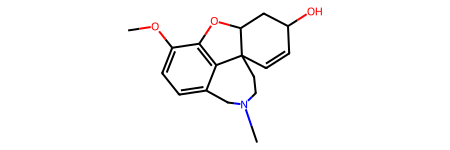

In [7]:
molecules[1].super_parent_mol

In [8]:
cleaned_df = pd.concat([i.to_dataframe() for i in molecules], ignore_index=True)

/var/folders/ll/v9q3qnpx27d8g0shfnvjnslrfgd6wf/T/ipykernel_66880/4078132824.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cleaned_df = pd.concat([i.to_dataframe() for i in molecules], ignore_index=True)


In [21]:
cleaned_df

,catalog_number,plate_location,rack_number,apex_cas_number,apex_item_name,apex_molecular_weight,apex_molecular_formula,apex_smiles,apex_valid_smiles,failed_cas_number,failed_item_name,failed_smiles,super_parent_smiles,super_parent_exact_mass,super_parent_molecular_weight,super_parent_molecular_formula,pubchem_cid
0,A1042,A01,1,4474-91-3,Angiotensin II,1046.20,C50H71N13O12,CCC(C)C(C(=O)NC(CC1=CN=CN1)C(=O)N2CCCC2C(=O)NC...,True,False,False,False,CCC(C)C(NC(=O)C(Cc1ccc(O)cc1)NC(=O)C(NC(=O)C(C...,1045.534515,1046.197,C50H71N13O12,172198
1,A1745,A02,1,1953-04-4,Galanthamine HBr,368.27,C17H21NO3.HBr,COC1=CC=C2C3=C1O[C@]4([H])[C@]3(C=C[C@H](O)C4)...,True,False,False,False,COc1ccc2c3c1OC1CC(O)C=CC31CCN(C)C2,287.152144,287.359,C17H21NO3,121587
2,A1765,A03,1,2068-78-2,Vincristine,923.04,C46H58N4O14S,O[C@]1(CC)CN(CC2)C[C@@](C1)([H])C[C@](C(OC)=O)...,True,False,False,False,CCC1(O)CC2CN(CCc3c([nH]c4ccccc34)C(C(=O)OC)(c3...,824.399644,824.972,C46H56N4O10,249332
3,A1796,A04,1,21535-47-7,Mianserin HCl,300.83,C18H20N2.HCl,CN1CC2C3=C(C=CC=C3)CC4=C(C=CC=C4)N2CC1.Cl,True,False,False,False,CN1CCN2c3ccccc3Cc3ccccc3C2C1,264.162649,264.372,C18H20N2,68551
4,A1832,A05,1,25316-40-9,Doxorubicin (Adriamycin) HCl,579.98,C27H29NO11.HCl,CC1C(C(CC(O1)OC2CC(CC3=C(C4=C(C(=C23)O)C(=O)C5...,True,False,False,False,COc1cccc2c(O)c3c(O)c4c(c(O)c3c(O)c12)=C(OC1CC(...,543.174061,543.525,C27H29NO11,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,N2772,B03,7,6812-81-3,Roburic acid,440.70,C30H48O2,CC1CCC2(CCC3(C(=CCC4C3(CCC(C4(C)CCC(=O)O)C(=C)...,True,False,False,False,C=C(C)C1CCC2(C)C(CC=C3C4C(C)C(C)CCC4(C)CCC32C)...,440.365431,440.712,C30H48O2,12315005
546,N2788,C03,7,535-83-1,Trigonelline,137.05,C7H7NO2,C[N+]1=CC=CC(=C1)C(=O)[O-],True,False,False,False,C[n+]1cccc(C(=O)[O-])c1,137.047678,137.138,C7H7NO2,5570
547,N2808,D03,7,73-03-0,Cordycepin,251.24,C10H13N5O3,C1C(OC(C1O)N2C=NC3=C2N=CN=C3N)CO,True,False,False,False,N=c1[nH]cnc2c1ncn2C1OC(CO)CC1O,251.101839,251.246,C10H13N5O3,6303
548,N2818,E03,7,76296-75-8,Polyphyllin VII,1049.20,C51H84O22,None,False,False,False,False,COC1(CCC(C)COC2OC(CO)C(O)C(O)C2O)OC2CC3C4CC=C5...,1048.545424,1049.211,C51H84O22,46200822


In [20]:
len(cleaned_df[~cleaned_df.apex_valid_smiles & cleaned_df.apex_smiles.isna()])

19